# Libraries

In [408]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import risk_models, expected_returns, EfficientFrontier, plotting

# Dataset via YFinance API

In [411]:
tickers = ['AAL.L', 'ABDN.L', 'ABF.L', 'AHT.L', 'ANTO.L', 'AV.L', 'AZN.L', 'BAES.L', 'BARC.L', 
           'BATS.L', 'BLND.L', 'BNZL.L', 'BP.L', 'BRBY.L', 'CCH.L', 'CPG.L', 'CRDA.L', 'CRH.L', 
           'DCC.L', 'DGE.L', 'ENT.L', 'EXPN.L', 'FERG.L', 'FRES.L', 'GLEN.L', 'GSK.L', 'HIK.L', 
           'HLMA.L', 'HSBA.L', 'IHG.L', 'III.L', 'IMB.L', 'INF.L', 'ITRK.L', 'ITV.L', 'JD.L', 
           'KGF.L', 'LAND.L', 'LGEN.L', 'LLOY.L', 'LSEG.L', 'MNDI.L', 'MNG.L', 'NG.L', 'NWG.L', 
           'NXT.L', 'OCDO.L', 'PHNX.L', 'PRU.L', 'PSN.L', 'PSON.L', 'REL.L', 'RIO.L', 'RKT.L', 
           'RMV.L', 'RR.L', 'RTO.L', 'SBRY.L', 'SDR.L', 'SGE.L', 'SGRO.L', 'SKG.L', 'SMDS.L', 
           'SMIN.L', 'SMT.L', 'SN.L', 'SPX.L', 'SSE.L', 'STAN.L', 'SVT.L', 'TSCO.L', 'TW.L', 
           'ULVR.L', 'UU.L', 'VOD.L', 'WPP.L', 'WTB.L']

In [413]:
# Fetch market capitalization for each ticker
mcap_data = {}
for ticker in tickers:
    stock_info = yf.Ticker(ticker).info
    if 'marketCap' in stock_info:
        mcap_data[ticker] = stock_info['marketCap']

# Create a DataFrame to organize market cap data
mcap_df = pd.DataFrame(list(mcap_data.items()), columns=['Ticker', 'MarketCap']).sort_values(by='MarketCap', ascending=False)

# Display top 10 tickers by market cap
print("Top 10 Tickers by Market Capitalization:")
print(mcap_df.head(10))

# Select top 10 tickers for further analysis
top_tickers_by_mcap = mcap_df['Ticker'].head(10).tolist()

# Download historical prices for top tickers
ohlc = yf.download(top_tickers_by_mcap, period="5y")

# Extract 'Close' prices for the top tickers
prices = ohlc['Close']

# Handle missing values in prices
prices = prices.ffill().interpolate(method="time").dropna(how="all")

# Display the last few rows of processed prices
print("Processed Historical Prices for Top Tickers:")
prices.tail()

Top 10 Tickers by Market Capitalization:
    Ticker     MarketCap
6    AZN.L  162163474432
27  HSBA.L  139302944768
70  ULVR.L  113196990464
51   RIO.L   76334612480
50   REL.L   67389177856
8   BATS.L   63753039872
11    BP.L   61029068800
39  LSEG.L   60079136768
18   DGE.L   56331247616
24   GSK.L   54780981248


[*********************100%***********************]  10 of 10 completed

Processed Historical Prices for Top Tickers:


Ticker,AZN.L,BATS.L,BP.L,DGE.L,GSK.L,HSBA.L,LSEG.L,REL.L,RIO.L,ULVR.L
Date,,,,,,,,,,
2024-12-19,10244.0,2894.0,379.049988,2525.5,1322.0,765.099976,11450.0,3654.0,4693.0,4581.0
2024-12-20,10256.0,2879.0,379.049988,2504.5,1320.0,760.799988,11320.0,3629.0,4668.0,4559.0
2024-12-23,10422.0,2875.0,380.700012,2493.5,1334.0,765.099976,11240.0,3608.0,4692.0,4555.0
2024-12-24,10436.0,2880.0,381.250000,2497.5,1339.5,772.000000,11325.0,3617.0,4700.0,4563.0
2024-12-27,10460.0,2893.0,385.450012,2535.0,1342.5,777.099976,11330.0,3631.0,4693.5,4577.0


In [414]:
# Calculate the covariance matrix 
cov_matrix = risk_models.sample_cov(prices, frequency=252)
print(cov_matrix)

Ticker     AZN.L    BATS.L      BP.L     DGE.L     GSK.L    HSBA.L    LSEG.L  \
Ticker                                                                         
AZN.L   0.062055  0.015301  0.013838  0.020744  0.029332  0.012200  0.016569   
BATS.L  0.015301  0.054431  0.032482  0.024589  0.019900  0.020864  0.009889   
BP.L    0.013838  0.032482  0.134075  0.027510  0.020381  0.050056  0.014466   
DGE.L   0.020744  0.024589  0.027510  0.058289  0.021485  0.025674  0.019854   
GSK.L   0.029332  0.019900  0.020381  0.021485  0.049034  0.015580  0.012777   
HSBA.L  0.012200  0.020864  0.050056  0.025674  0.015580  0.081155  0.010148   
LSEG.L  0.016569  0.009889  0.014466  0.019854  0.012777  0.010148  0.066941   
REL.L   0.019800  0.019026  0.023541  0.028639  0.021740  0.020098  0.024829   
RIO.L   0.012020  0.019285  0.059158  0.020764  0.014300  0.036590  0.018762   
ULVR.L  0.017008  0.018448  0.009967  0.021214  0.016606  0.012807  0.010221   

Ticker     REL.L     RIO.L    ULVR.L  


In [415]:
# Calculate the Correlation matrix 
corr_matrix = risk_models.cov_to_corr(cov_matrix)
print(corr_matrix)

Ticker     AZN.L    BATS.L      BP.L     DGE.L     GSK.L    HSBA.L    LSEG.L  \
Ticker                                                                         
AZN.L   1.000000  0.263269  0.151704  0.344910  0.531750  0.171915  0.257078   
BATS.L  0.263269  1.000000  0.380225  0.436537  0.385193  0.313922  0.163831   
BP.L    0.151704  0.380225  1.000000  0.311189  0.251358  0.479867  0.152696   
DGE.L   0.344910  0.436537  0.311189  1.000000  0.401870  0.373281  0.317836   
GSK.L   0.531750  0.385193  0.251358  0.401870  1.000000  0.246975  0.223013   
HSBA.L  0.171915  0.313922  0.479867  0.373281  0.246975  1.000000  0.137677   
LSEG.L  0.257078  0.163831  0.152696  0.317836  0.223013  0.137677  1.000000   
REL.L   0.365051  0.374543  0.295268  0.544798  0.450897  0.324018  0.440750   
RIO.L   0.156279  0.267708  0.523250  0.278534  0.209144  0.415986  0.234856   
ULVR.L  0.335393  0.388442  0.133715  0.431635  0.368386  0.220847  0.194072   

Ticker     REL.L     RIO.L    ULVR.L  


# Visualisation of subset of dataset, covariance and correlation 

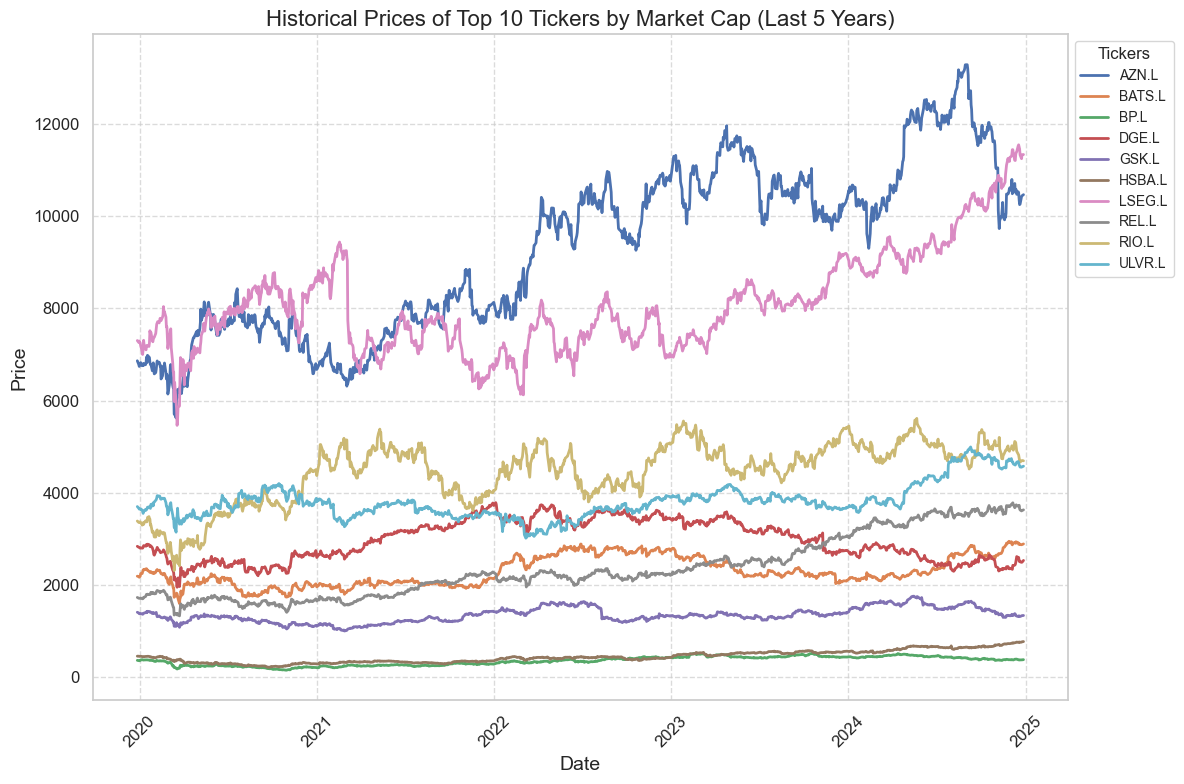

In [417]:
# Visualise historical prices of 10 top-performing tickers
fig, ax = plt.subplots(figsize=(12, 8))

for ticker in prices.columns:
    ax.plot(prices.index, prices[ticker], label=ticker, linewidth=2)

# Customize the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Tickers", fontsize=10)

# Customize the plot
ax.set_title("Historical Prices of Top 10 Tickers by Market Cap (Last 5 Years)", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

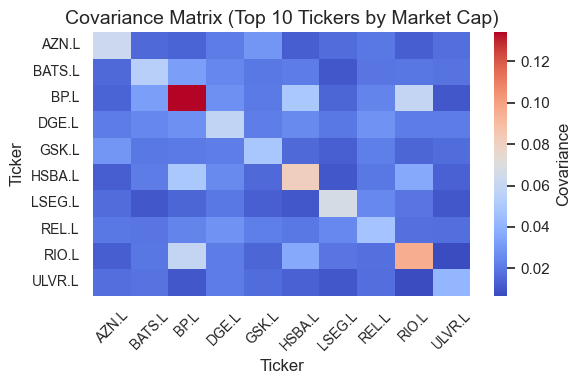

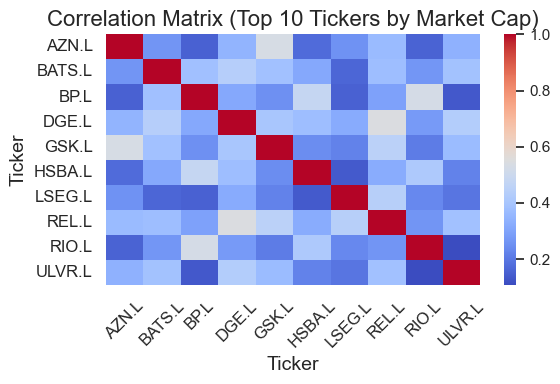

In [418]:
# Plot heatmap for covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'Covariance'}, xticklabels=cov_matrix.columns, yticklabels=cov_matrix.columns)
plt.title('Covariance Matrix (Top 10 Tickers by Market Cap)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title("Correlation Matrix (Top 10 Tickers by Market Cap)", fontsize=16)
plt.xlabel("Ticker", fontsize=14)
plt.ylabel("Ticker", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

However, the sample covariance matrix should not be the default choice for risk model. In the below we will use Ledoit-Wolf shrinkage that reduces extreme values.

- Ledoit-Wolf shrinkage performs well even when the number of assets is large relative to the number of observations, making it suitable for high-dimensional settings.
- By imposing structure, the shrinkage estimator is less sensitive to random fluctuations in historical data.

In [420]:
# Calculate Expected Returns and Covariance Matrix
print("Calculating Expected Returns and Covariance Matrix...")
mu = expected_returns.capm_return(prices)
print("Expected Returns (CAPM):")
print(mu)

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
print("\nCovariance Matrix (Ledoit-Wolf Shrinkage):")
print(S)

Calculating Expected Returns and Covariance Matrix...
Expected Returns (CAPM):
Ticker
AZN.L     0.070177
BATS.L    0.075098
BP.L      0.123597
DGE.L     0.086175
GSK.L     0.070904
HSBA.L    0.091437
LSEG.L    0.065557
REL.L     0.076942
RIO.L     0.096436
ULVR.L    0.055047
Name: mkt, dtype: float64

Covariance Matrix (Ledoit-Wolf Shrinkage):
Ticker     AZN.L    BATS.L      BP.L     DGE.L     GSK.L    HSBA.L    LSEG.L  \
Ticker                                                                         
AZN.L   0.062234  0.014788  0.013374  0.020048  0.028349  0.011791  0.016014   
BATS.L  0.014788  0.054865  0.031392  0.023764  0.019233  0.020165  0.009558   
BP.L    0.013374  0.031392  0.131839  0.026588  0.019697  0.048377  0.013981   
DGE.L   0.020048  0.023764  0.026588  0.058594  0.020764  0.024813  0.019188   
GSK.L   0.028349  0.019233  0.019697  0.020764  0.049649  0.015057  0.012348   
HSBA.L  0.011791  0.020165  0.048377  0.024813  0.015057  0.080693  0.009807   
LSEG.L  0.0160

# ESG-Constrained Portfolios (No, Mild & Aggressive)

In [427]:
# ESG scores to include only the top 10 tickers
esg_scores_top = np.random.uniform(0, 1, len(top_tickers_by_mcap))  # Generate scores for top tickers

# Scenario 1: Portfolio Optimization (No ESG Constraints)
print("Scenario 1: Optimizing Portfolio without ESG Constraints...")
ef = EfficientFrontier(mu, S)
print("Maximizing Sharpe Ratio for Unconstrained Portfolio...")
ef.max_sharpe()
ef_max_sharpe = ef.deepcopy()
weights_no_esg = ef.clean_weights()

print("\nPortfolio Performance (No ESG Constraints):")
no_esg_performance = ef.portfolio_performance(verbose=True)

# Scenario 2: Portfolio Optimization (Mild ESG Constraints)
print("\nScenario 2: Optimizing Portfolio with Mild ESG Constraints (Minimum 0.6 ESG Score)...")
ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score_mild = 0.6 # create a portfolio with min 0.6 ESG score
ef_esg_mild.add_constraint(lambda w: esg_scores_top  @ w >= portfolio_min_score_mild)  # Minimum weighted ESG score
print("Applying Mild ESG Constraint...")
ef_esg_mild.max_sharpe()
weights_mild_esg = ef_esg_mild.clean_weights()

print("\nPortfolio Performance (Mild ESG Constraints):")
mild_esg_performance = ef_esg_mild.portfolio_performance(verbose=True)

# Scenario 3: Portfolio Optimization (Aggressive ESG Constraints)
print("\nScenario 3: Optimizing Portfolio with Aggressive ESG Constraints (Minimum 0.8 ESG Score)...")
ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score_aggresive = 0.8 # create a portfolio with min 0.6 ESG score
ef_esg_aggressive.add_constraint(lambda w: esg_scores_top  @ w >= portfolio_min_score_aggresive)  # Higher ESG threshold
print("Applying Aggressive ESG Constraint...")
ef_esg_aggressive.max_sharpe()
weights_aggressive_esg = ef_esg_aggressive.clean_weights()

print("\nPortfolio Performance (Aggressive ESG Constraints):")
aggressive_esg_performance = ef_esg_aggressive.portfolio_performance(verbose=True)


Scenario 1: Optimizing Portfolio without ESG Constraints...
Maximizing Sharpe Ratio for Unconstrained Portfolio...

Portfolio Performance (No ESG Constraints):
Expected annual return: 8.1%
Annual volatility: 15.7%
Sharpe Ratio: 0.52

Scenario 2: Optimizing Portfolio with Mild ESG Constraints (Minimum 0.6 ESG Score)...
Applying Mild ESG Constraint...

Portfolio Performance (Mild ESG Constraints):
Expected annual return: 8.0%
Annual volatility: 15.7%
Sharpe Ratio: 0.51

Scenario 3: Optimizing Portfolio with Aggressive ESG Constraints (Minimum 0.8 ESG Score)...
Applying Aggressive ESG Constraint...

Portfolio Performance (Aggressive ESG Constraints):
Expected annual return: 7.9%
Annual volatility: 16.9%
Sharpe Ratio: 0.47


In [429]:
# Compare Portfolio Performance
print("\nComparing Portfolio Performance Across Scenarios...")
performance_df = pd.DataFrame({
    "No ESG Constraints": no_esg_performance,
    "Mild ESG Target (≥0.6)": mild_esg_performance,
    "Aggressive ESG Target (≥0.8)": aggressive_esg_performance
}, index=["Expected Annual Return", "Annual Volatility", "Sharpe Ratio"])

performance_df_percent = performance_df.copy()
performance_df_percent.loc["Expected Annual Return"] *= 100
performance_df_percent.loc["Annual Volatility"] *= 100
performance_df_percent.loc["Sharpe Ratio"] = performance_df.loc["Sharpe Ratio"]  # Keep Sharpe Ratio as-is

# Display the performance comparison in percentages
print(performance_df_percent)


Comparing Portfolio Performance Across Scenarios...
                        No ESG Constraints  Mild ESG Target (≥0.6)  \
Expected Annual Return            8.125732                7.991546   
Annual Volatility                15.733778               15.671769   
Sharpe Ratio                      0.516451                0.509933   

                        Aggressive ESG Target (≥0.8)  
Expected Annual Return                      7.887447  
Annual Volatility                          16.901576  
Sharpe Ratio                                0.466669  


# Visualisation of preformance of ESG-Constrained portfolios using plt and sns

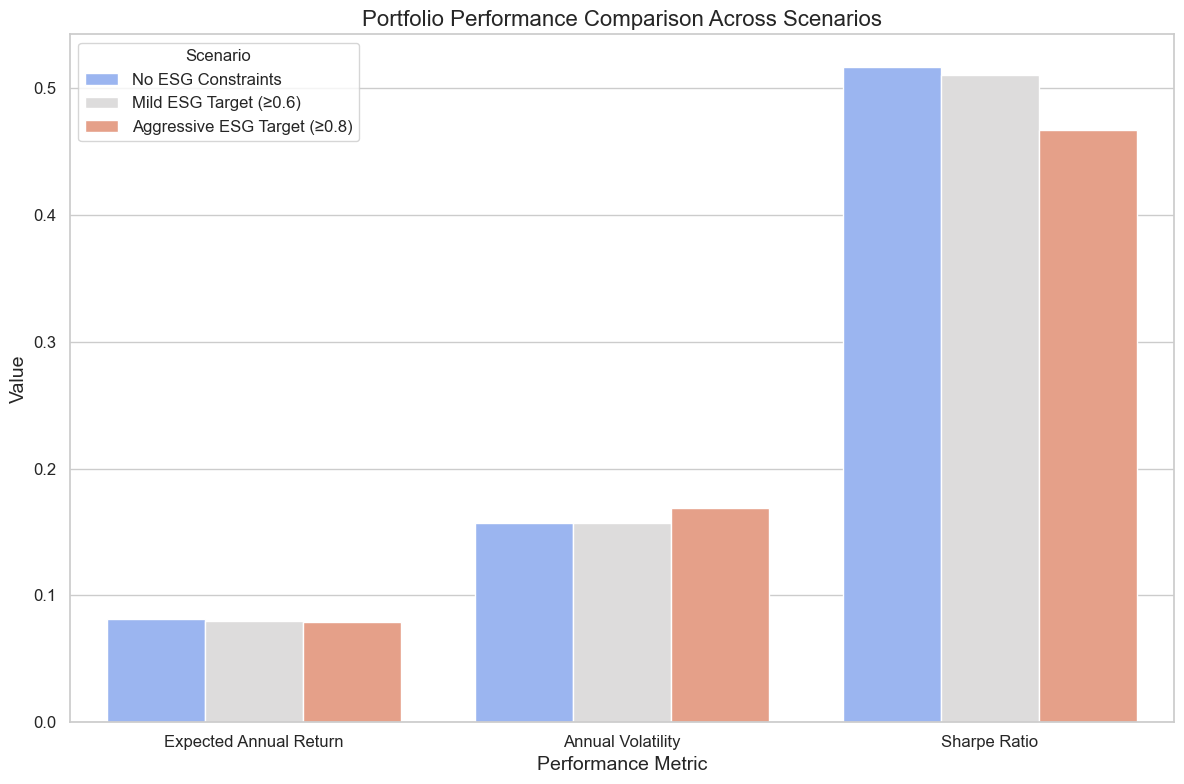

In [432]:
# Prepare data for visualization
comparison_df = performance_df.T.reset_index()
comparison_df.rename(columns={"index": "Scenario"}, inplace=True)

# Reshape the data for easier plotting
comparison_melted = comparison_df.melt(id_vars=["Scenario"], var_name="Metric", value_name="Value")

# Plot Expected Return, Volatility, and Sharpe Ratio
plt.figure(figsize=(12, 8))
sns.barplot(data=comparison_melted, x="Metric", y="Value", hue="Scenario", palette="coolwarm")
plt.title("Portfolio Performance Comparison Across Scenarios", fontsize=16)
plt.xlabel("Performance Metric", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Scenario", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()



Heatmap of Portfolio Performance (Values in %):


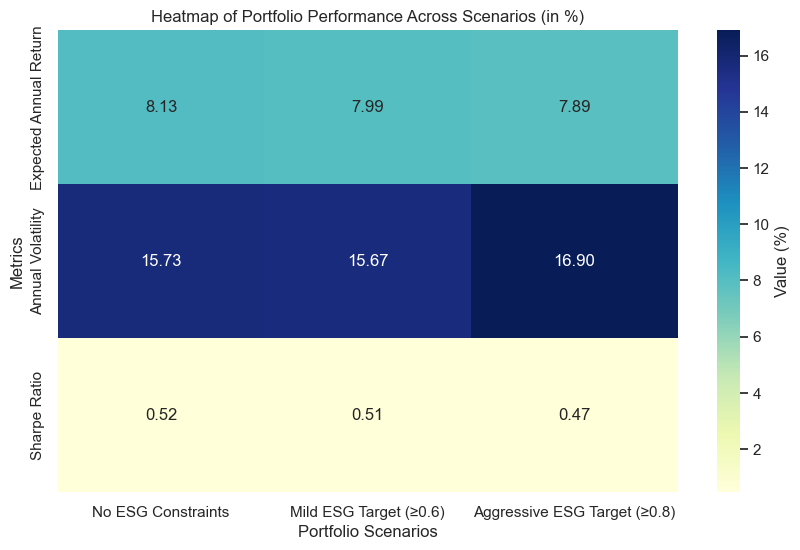

In [434]:
# Display Portfolio Performance as a Heatmap

print("\nHeatmap of Portfolio Performance (Values in %):")
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df_percent, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Value (%)'})
plt.title("Heatmap of Portfolio Performance Across Scenarios (in %)")
plt.xlabel("Portfolio Scenarios")
plt.ylabel("Metrics")
plt.show()
